# Imports

In [ ]:
!pip install --upgrade pyalgotrading


In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "71d4e9c405acc3f595ff62eaf96806127d921292"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O volatility_trend_atr.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/volatility_trend_atr/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' volatility_trend_atr.py

In [5]:
from volatility_trend_atr import VolatilityTrendATR as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 135448,
 'strategyId': '76d2bdd9b31f4f95bfd76443a136f29d'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('TATAPOWER', exchange='NSE')
instrument

[{'id': 453, 'value': 'NSE:TATAPOWER'},
 {'id': 1679080, 'value': 'NSE:TATAPOWER.AF'},
 {'id': 1675518, 'value': 'NSE:TATAPOWER.BL'},
 {'id': 1676317, 'value': 'NSE:TATAPOWER.RL'},
 {'id': 40654, 'value': 'NSE:TATAPOWER20DEC38CE'},
 {'id': 40655, 'value': 'NSE:TATAPOWER20DEC38PE'},
 {'id': 40656, 'value': 'NSE:TATAPOWER20DEC39CE'},
 {'id': 40657, 'value': 'NSE:TATAPOWER20DEC39PE'},
 {'id': 40658, 'value': 'NSE:TATAPOWER20DEC40CE'},
 {'id': 40659, 'value': 'NSE:TATAPOWER20DEC40PE'}]

## Setup Parameters

In [9]:
parameters = {
  'ATR_PREV_CANDLES_NUM':70,
   'TIMEPERIOD_ATR': 20
}

In [10]:
initial_virtual_funds = 1000000000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:TATAPOWER', 
    lots=2,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Volatility Trend ATR' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════════════════╕
│ Config                  │ Value                                              │
╞═════════════════════════╪════════════════════════════════════════════════════╡
│ Strategy Name           │ Volatility Trend ATR                               │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                        │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:TATAPOWER']                                  │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 2                                                  │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 0

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTED', 'status': 2}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

[2023-10-23 18:59:12] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-23 18:59:12] Sanity checks on cfg successful.
[2023-10-23 18:59:12] Currency set to "INR"
[2023-10-23 18:59:12] Setting up broker connection...
[2023-10-23 18:59:13] Broker connection has been setup successfully.
[2023-10-23 18:59:13] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2023-10-23 18:59:13] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-23 18:59:13] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-23 18:59:13] Reading strategy...
[2023-10-23 18:59:13] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,TATAPOWER,2023-03-27 10:15:00+05:30,BUY,2,₹,190.70,2023-03-27 15:30:00+05:30,SELL,2,₹,186.25,-8.9,-8.9,0,-8.9
1,NSE,TATAPOWER,2023-03-28 09:15:00+05:30,BUY,2,₹,186.70,2023-03-28 15:30:00+05:30,SELL,2,₹,184.05,-5.3,-14.2,0,-5.3
2,NSE,TATAPOWER,2023-03-29 09:15:00+05:30,BUY,2,₹,184.50,2023-03-29 15:30:00+05:30,SELL,2,₹,185.25,1.5,-12.7,0,1.5
3,NSE,TATAPOWER,2023-03-31 09:15:00+05:30,BUY,2,₹,188.50,2023-03-31 15:30:00+05:30,SELL,2,₹,190.25,3.5,-9.2,0,3.5
4,NSE,TATAPOWER,2023-04-03 09:15:00+05:30,BUY,2,₹,193.35,2023-04-03 15:30:00+05:30,SELL,2,₹,194.00,1.3,-7.9,0,1.3
5,NSE,TATAPOWER,2023-04-05 09:15:00+05:30,BUY,2,₹,194.65,2023-04-05 15:30:00+05:30,SELL,2,₹,194.55,-0.2,-8.1,0,-0.2
6,NSE,TATAPOWER,2023-04-06 09:15:00+05:30,SELL,2,₹,193.50,2023-04-06 10:15:00+05:30,BUY,2,₹,193.20,0.6,-7.5,0,0.6
7,NSE,TATAPOWER,2023-04-06 10:15:00+05:30,BUY,2,₹,193.20,2023-04-06 15:30:00+05:30,SELL,2,₹,195.15,3.9,-3.6,0,3.9
8,NSE,TATAPOWER,2023-04-10 09:15:00+05:30,BUY,2,₹,195.50,2023-04-10 15:30:00+05:30,SELL,2,₹,195.70,0.4,-3.2,0,0.4
9,NSE,TATAPOWER,2023-04-11 09:15:00+05:30,BUY,2,₹,197.00,2023-04-11 15:30:00+05:30,SELL,2,₹,197.40,0.8,-2.4,0,0.8


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2023-03-27
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      91.0%

Cumulative Return   -0.0%
CAGR﹪              -0.0%

Sharpe              -0.13
Prob. Sharpe Ratio  46.53%
Sortino             -0.15
Sortino/√2          -0.11
Omega               0.98

Max Drawdown        -0.0%
Longest DD Days     47

Gain/Pain Ratio     -0.03
Gain/Pain (1M)      -0.1

Payoff Ratio        0.77
Profit Factor       0.98
Common Sense Ratio  1.18
CPC Index           0.42
Tail Ratio          1.22
Outlier Win Ratio   3.76
Outlier Loss Ratio  2.81

MTD                 -0.0%
3M                  -0.0%
6M                  -0.0%
YTD                 -0.0%
1Y                  -0.0%
3Y (ann.)           -0.0%
5Y (ann.)           -0.0%
10Y (ann.)          -0.0%
All-time (ann.)     -0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  10
Recovery Factor     -0.08
Ulcer Index         0.0
Serenity Index      -0.06


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2023-03-27
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             91.0%

Cumulative Return          -0.0%
CAGR﹪                     -0.0%

Sharpe                     -0.13
Prob. Sharpe Ratio         46.53%
Smart Sharpe               -0.12
Sortino                    -0.15
Smart Sortino              -0.15
Sortino/√2                 -0.11
Smart Sortino/√2           -0.1
Omega                      0.98

Max Drawdown               -0.0%
Longest DD Days            47
Volatility (ann.)          0.0%
Calmar                     -0.24
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           -0.0%
Expected Monthly %         -0.0%
Expected Yearly %          -0.0%
Kelly Criterion            -1.43%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       6
Ma

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-07-05,2023-07-28,2023-07-31,26,-4.800000e-06,-4.780000e-06
2,2023-04-20,2023-05-24,2023-06-06,47,-2.640000e-06,-2.530000e-06
3,2023-06-09,2023-06-14,2023-06-22,13,-1.130000e-06,-8.700000e-07
4,2023-03-28,2023-03-28,2023-04-03,6,-5.300000e-07,-3.800000e-07
5,2023-06-30,2023-06-30,2023-07-03,3,-3.700000e-07,-2.600000e-07


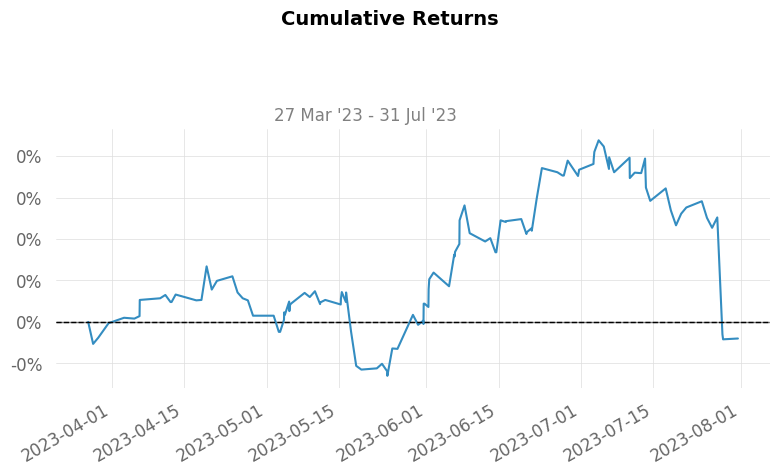

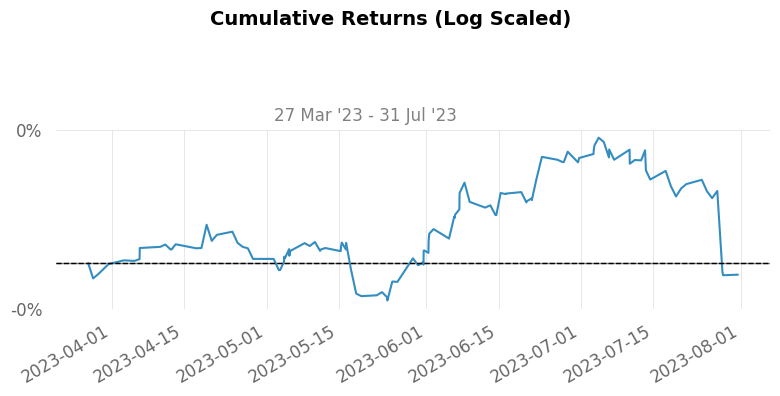

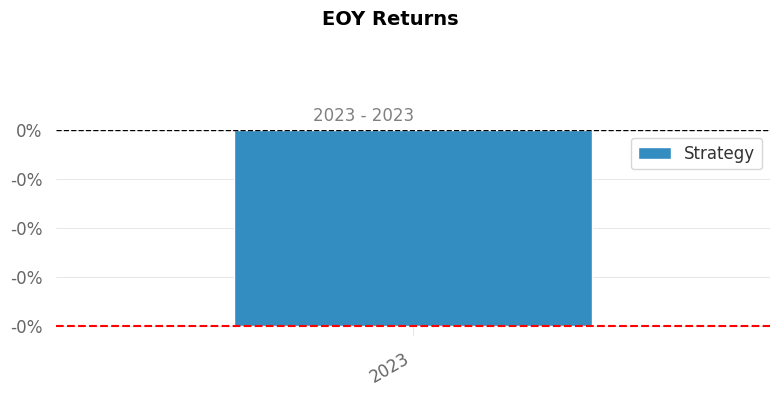

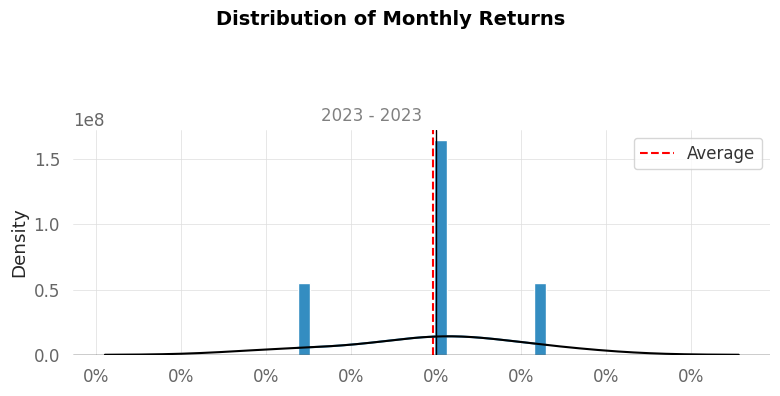

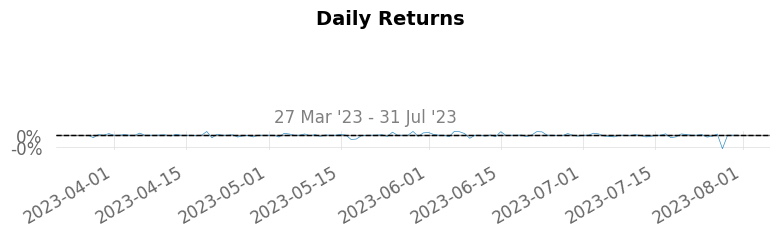

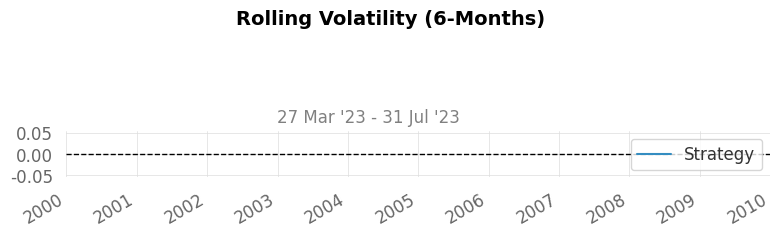

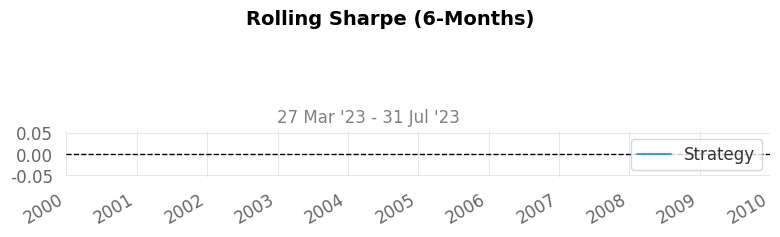

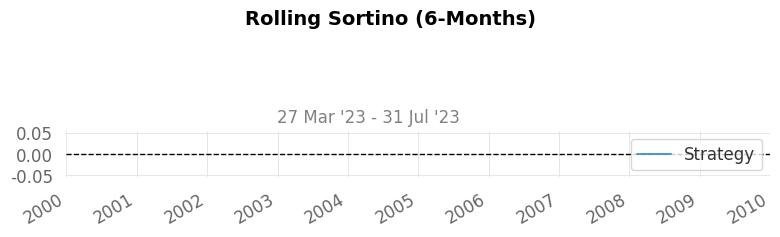

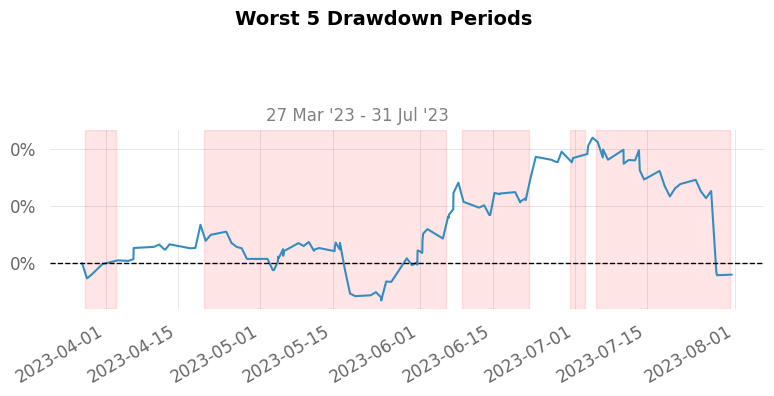

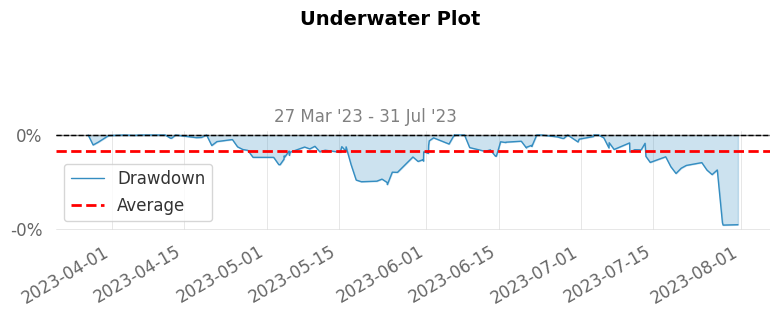

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


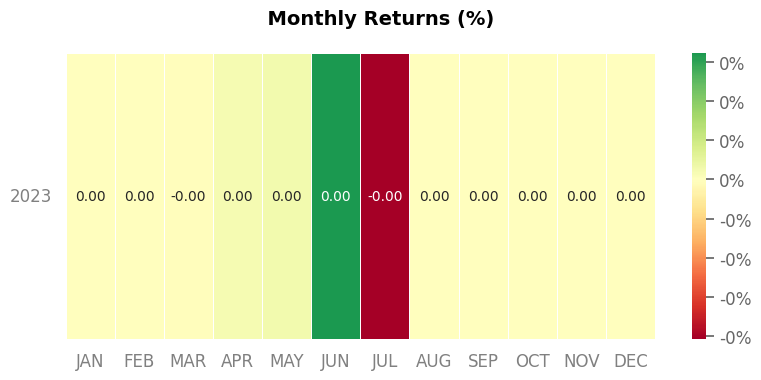

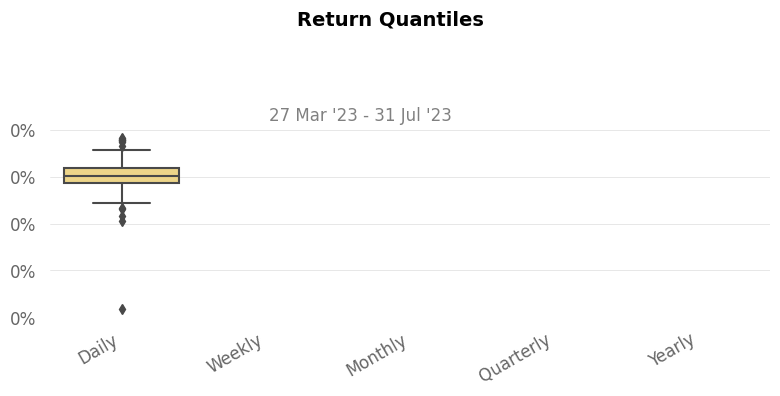

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True )

### Order History

In [ ]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:ADANIPOWER', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---